Ex 4.10 Final Project Instacart Basket Analysis Customer Profiling (ads, bonus programs and sales information) - Lisa Coombs

This script contains the following for PART 1:
1. Import Libraries
2. Create Path
3. Task 1: Import Fully Joined Dataframes: Ords_Prods_Cust_Merge

4. Task 2: Consider any security implications that might exist for this new data and address any PII data in the data before continuing your analysis.

5. Task 3: Instacart officers are interested in comparing customer behavior in different geographic areas

            a. Create a regional segmentation of the data
            b. Determine whether there’s a difference in spending habits between the different U.S. regions


6. Task 4: Create exclusion flags for low activity customers, exclude from data and export sample.
    
7. Task 5: Create a profiling variable based on age, income, and number of dependents. 
8. Task 6: Create an appropriate visualization to show the distribution of profiles.
9. Task 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

10. Task 8: Compare your customer profiles with regions and departments.

            a. Using crosstabs to identify possible link between them to see if customers demonstrate different behaviors across regions

11. Task 9: Produce suitable charts to illustrate your results and export them in your project folder
12. Export DataFrame to .pkl file in Prepared Data folder

1. ***Import Libraries***

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

2. ***Create Path***

In [6]:
path=r'C:\Users\lisac\10-10-2024 Instacart Basket Analysis'

3. ***Import fully joined dataframes***

In [8]:
df_opc=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merge_12.16.pkl' ))

In [9]:
#Checking number of rows and columns via .shape function
df_opc.shape

(32404859, 35)

In [10]:
#Confirm dataframe is pandas
print(type(df_opc)) 

<class 'pandas.core.frame.DataFrame'>


4. ***Task 2: Consider any security implications that might exist for this new data and address any PII data in the data before continuing your analysis***


Observation:  The customer data is PII data.  According to the GDPR, personal data includes any information that can identify a person, 
directly or indirectly, such as Name, Email address, IP address, Location data, Health records,Biometric or genetic data.  The customer data contained
the first and last name and the state of the customer base for Instacart.  Additionally, this part of the task is requesting an analysis of customer 
behavior based on region.  The reading indicates that a Data Analyst will be informed about how to handle PII data.  For the purposes of this exercise,
this data has been fabricated for learning purposes.

5.***Task 3: Instacart officers are interested in comparing customer behavior in different geographic areas***

***3a: Create regional segmentation of data using regions from Wikipedia***

In [15]:
#Create regions from Wikipedia link using .loc function - Northeast
df_opc.loc[df_opc['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 
                             'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 
                             'New Jersey']), 'Region'] = 'Northeast'

In [16]:
#Create regions from Wikipedia link using .loc function - Midwest
df_opc.loc[df_opc['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 
                            'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 
                             'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'Region']='Midwest'

In [17]:
#Create regions from Wikipedia link using .loc function - South
df_opc.loc[df_opc['State'].isin(['Delaware', 'Maryland', 'District of Columbia', 
                             'Virginia', 'West Virginia', 'North Carolina',
                             'South Carolina', 'Georgia', 'Florida', 'Kentucky'
                             'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma',
                             'Texas', 'Arkansas', 'Louisiana']), 'Region']='South'

In [18]:
#Create regions from Wikipedia link using .loc function - West
df_opc.loc[df_opc['State'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah',
                             'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
                             'Washington', 'Oregon', 'California', 'Hawaii']), 'Region']='West'

In [19]:
#Checking column headers to see if "Region" column has bee added correctly using the .head() and .tail() functions
df_opc.head(3)

,order_id,Customer_ID,order_number,order_hour_of_day,days_since_prior_order,order_day_of_week_name,is_first_order,product_id,add_to_cart_order,reordered,...,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,_merge2,Region
0,2539329,1,1,8,0.0,Tuesday,1,196,1,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,8,0.0,Tuesday,1,14084,2,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,8,0.0,Tuesday,1,12427,3,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [20]:
df_opc.tail(3)

,order_id,Customer_ID,order_number,order_hour_of_day,days_since_prior_order,order_day_of_week_name,is_first_order,product_id,add_to_cart_order,reordered,...,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,_merge2,Region
32404856,2977660,206209,13,12,7.0,Monday,0,31477,7,0,...,Donovan,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest
32404857,2977660,206209,13,12,7.0,Monday,0,6567,8,0,...,Donovan,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest
32404858,2977660,206209,13,12,7.0,Monday,0,22920,9,0,...,Donovan,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest


In [21]:
#Checking number of rows and columns via .shape function
df_opc.shape

(32404859, 36)

Observation: used the .loc function to derive a regional column from the state colyumn.  Checked the dataframe with the .head(), .tail(), and .shape functions to verify "Region" column and number of columns.  All is correct.

***3b: Determine spending habit differences between the different U.S. regions using crosstab***

In [24]:
#Printing all column headers for reference
column_headers = df_opc.columns.tolist()
print(column_headers)

['order_id', 'Customer_ID', 'order_number', 'order_hour_of_day', 'days_since_prior_order', 'order_day_of_week_name', 'is_first_order', 'product_id', 'add_to_cart_order', 'reordered', '_merge_old', 'product_name', 'aisle_id', 'department_id', 'prices', 'price_range_loc', 'Busiest_Day', 'Busiest_Days', 'Busiest_Period_of_Day', 'max_order', 'loyalty_flag', 'avg_product_price', 'spend_flag', 'avg_days_between_orders', 'order_frequency_flag', 'First Name', 'Last Name', 'Gender', 'State', 'Age', 'Date Joined', 'Number of Dependents', 'Family Status', 'Income', '_merge2', 'Region']


In [25]:
#Create crosstab for Regions vs spend_flag
region_spend_crosstab=pd.crosstab(df_opc['Region'], df_opc['spend_flag'], dropna=False)

In [26]:
#Export directly to Excel
region_spend_crosstab.to_excel('region_spend_crosstab.xlsx')

In [27]:
#Display Region vs High / Low Spender
region_spend_crosstab

spend_flag,High Spender,Low Spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,187842,9353680
West,160354,8132559
NaN,21849,1228514


Observations:  Both High and Low Spenders are concentrated in the South.  While there is great potential to encourage Low Spenders with marketing campaigns, it might be worth while to focus specific efforts in the Southern Region. The potential impact to sales could be greater with a focused campaign.  

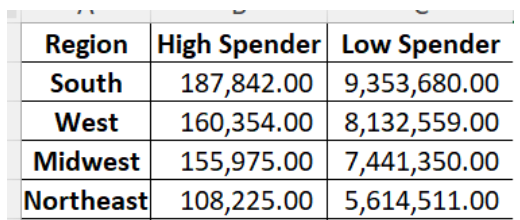

6. ***Task 4: Create exclusion flags for low activity customers, exclude from data and export sample***

In [30]:
#Create conditions for exclusion flag for low, Mid, and High-Activity customers using .loc function
df_opc.loc[df_opc['max_order']<5, 'Order_Activity']='low_activity_customer'

In [31]:
df_opc.loc[(df_opc['max_order']>=5) & (df_opc['max_order']<15), 'Order_Activity']='mid_activity_customer'

In [32]:
df_opc.loc[df_opc['max_order']>=15, 'Order_Activity']='high_activity_customer'

In [33]:
df_opc.head(3)
df_opc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 37 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   order_id                 int64   
 1   Customer_ID              int64   
 2   order_number             int64   
 3   order_hour_of_day        int64   
 4   days_since_prior_order   float64 
 5   order_day_of_week_name   object  
 6   is_first_order           int64   
 7   product_id               int64   
 8   add_to_cart_order        int64   
 9   reordered                int64   
 10  _merge_old               category
 11  product_name             object  
 12  aisle_id                 int64   
 13  department_id            int64   
 14  prices                   float64 
 15  price_range_loc          object  
 16  Busiest_Day              object  
 17  Busiest_Days             object  
 18  Busiest_Period_of_Day    object  
 19  max_order                int64   
 20  loyalty_flag          

In [34]:
#Counting the low, Mid and High activity customers
df_opc['Order_Activity'].value_counts(dropna = False)

Order_Activity
high_activity_customer    23176507
mid_activity_customer      7788057
low_activity_customer      1440295
Name: count, dtype: int64

In [35]:
#Excluding low_Activity_Customers from dataframe
df_excluded = df_opc[df_opc['Order_Activity'] != 'low_activity_customer']

In [36]:
#Use query to exclude low_activity_customer
df_excluded = df_opc.query("Order_Activity != 'low_activity_customer'")

In [37]:
#Inspecting df_excluded for low_activity_customer executed properly
df_excluded.head()
df_excluded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 37 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   order_id                 int64   
 1   Customer_ID              int64   
 2   order_number             int64   
 3   order_hour_of_day        int64   
 4   days_since_prior_order   float64 
 5   order_day_of_week_name   object  
 6   is_first_order           int64   
 7   product_id               int64   
 8   add_to_cart_order        int64   
 9   reordered                int64   
 10  _merge_old               category
 11  product_name             object  
 12  aisle_id                 int64   
 13  department_id            int64   
 14  prices                   float64 
 15  price_range_loc          object  
 16  Busiest_Day              object  
 17  Busiest_Days             object  
 18  Busiest_Period_of_Day    object  
 19  max_order                int64   
 20  loyalty_flag             ob

In [38]:
#Export Low_Activity_Customer as .pkl file to Prepared Data folder
df_excluded.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_excluded.pkl'))

7. ***Task 5: Create a profiling variable based on age, income, and number of dependents***

***Assessing the ranges for each category in order to derive profiling variable***

NOTE:  I reverted back to using df_opc dataframe for the rest of the task in this lesson

**RANGE - AGE**

In [43]:
min_age = df_opc['Age'].min()
max_age = df_opc['Age'].max()

In [44]:
print(f"The range of ages is from {min_age} to {max_age}.")

The range of ages is from 18 to 81.


**RANGE - INCOME**

In [46]:
min_income=df_opc['Income'].min()
max_income=df_opc['Income'].max()

In [47]:
print(f"The range of incomes is from {min_income} to {max_income}.")

The range of incomes is from 25903 to 593901.


**RANGE - DEPENDENTS**

In [49]:
min_dependents=df_opc['Number of Dependents'].min()
max_dependents=df_opc['Number of Dependents'].max()

In [50]:
print(f"The range of dependents is from {min_dependents} to {max_dependents}.")

The range of dependents is from 0 to 3.


**PROFILING VARIABLE - AGE**

In [52]:
#Create profiling variable for AGE: young adult <25, adult 25-40, older adult 40-65, senior 65>
df_opc.loc[df_opc['Age']<25,'Age_Group_Flag']='Young Adult'

In [53]:
df_opc.loc[(df_opc['Age'] >= 25) & (df_opc['Age'] < 40), 'Age_Group_Flag'] = 'Adult'

In [54]:
df_opc.loc[(df_opc['Age'] >= 40) & (df_opc['Age'] < 65), 'Age_Group_Flag'] = 'Older Adult'

In [55]:
df_opc.loc[(df_opc['Age']>=65) & (df_opc['Age'] <81),'Age_Group_Flag']='Senior'

In [56]:
#Checking to see if Age_Group_Flag was created correctly
df_opc[['Age', 'Age_Group_Flag']].head(3)

,Age,Age_Group_Flag
0,31,Adult
1,31,Adult
2,31,Adult


Observation:  The profiling variables for Age were created correctly!  Age 31 falls within the parameters of the group "Adult" between 25-40 years old.

In [58]:
df_opc['Age_Group_Flag'].value_counts()

Age_Group_Flag
Older Adult    12665583
Senior          8065800
Adult           7591191
Young Adult     3573001
Name: count, dtype: int64

 **PROFILING VARIABLE - INCOME**

In [60]:
#Create profiling variable for INCOME 
df_opc.loc[df_opc['Income']<80000,'Income_Group_Flag']='Low Income'

In [61]:
df_opc.loc[(df_opc['Income'] >= 80000) & (df_opc['Income'] < 180000), 'Income_Group_Flag'] = 'Middle Income'

In [62]:
df_opc.loc[(df_opc['Income']>=180000) & (df_opc['Income'] <600000),'Income_Group_Flag']='High Income'

#Checking to see if Income_Group_Flag was created correctly
df_opc[['Income', 'Income_Group_Flag']].head(3)

Observation: The profiling variables for Income were created correctly!  An income of 40423 falls within the parameters for low income.

In [65]:
df_opc['Income_Group_Flag'].value_counts()

Income_Group_Flag
Middle Income    20535220
Low Income       11573799
High Income        295840
Name: count, dtype: int64

 **PROFILING VARIABLE - DEPENDENTS**

In [67]:
#Create profiling variable for DEPENDENTS 
df_opc.loc[df_opc['Number of Dependents']<=0,'Dependent_Group_Flag']='No Dependents'

In [68]:
df_opc.loc[df_opc['Number of Dependents']>=1,'Dependent_Group_Flag']='Has Dependents'

In [69]:
#Checking to see if Dependent_Group_Flag was created correctly
df_opc[['Number of Dependents', 'Dependent_Group_Flag']].head(3)

,Number of Dependents,Dependent_Group_Flag
0,3,Has Dependents
1,3,Has Dependents
2,3,Has Dependents


Observation:  The profiling variables for Dependents were created correctly!  Anything 1 and above is considered as having dependents.

In [71]:
df_opc['Dependent_Group_Flag'].value_counts()

Dependent_Group_Flag
Has Dependents    24307356
No Dependents      8097503
Name: count, dtype: int64

8. ***Task 6: Create an appropriate visualization to show the distribution of profiles***

***Pie Chart for Age_Group_FLag***

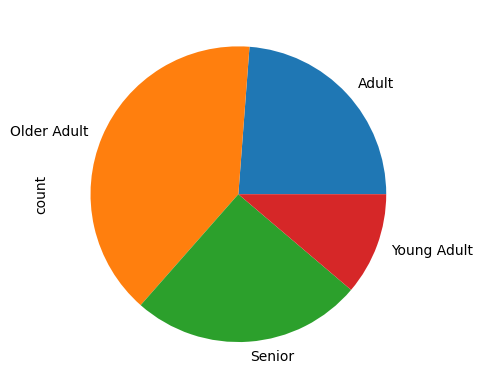

In [74]:
#Create PIE chart for AGE
pie = df_opc['Age_Group_Flag'].value_counts().sort_index().plot.pie(color=['red', 'orange', 'yellow', 'green'])

Observaton: Older Adults aged 40-65 dominate the customer base, while the Young Adults aged 25 or younger are the lowest group of customers in the Instacart dataframe.  Additionally, even though I specified the color 'yellow', 'blue' was substituted.

In [76]:
#Saving pie chart to "Visualizations" folder 
pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Ex4.10_Age_Group_Flag_Pie.png'))

***Bar Chart for Income_Group_FLag***

(array([0, 1, 2]),
 [Text(0, 0, 'High Income'),
  Text(1, 0, 'Low Income'),
  Text(2, 0, 'Middle Income')])

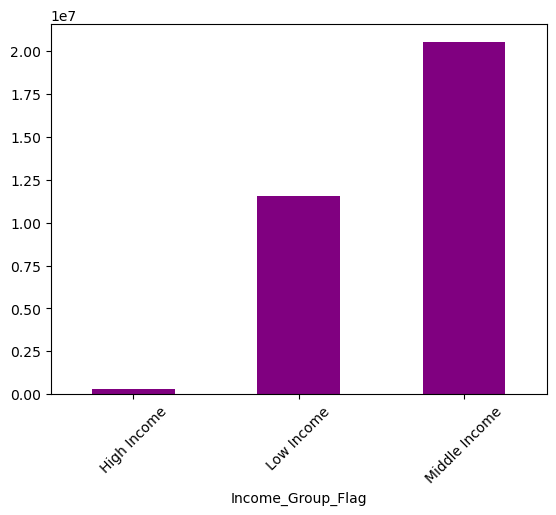

In [78]:
#Create BAR chart for INCOME
bar = df_opc['Income_Group_Flag'].value_counts().sort_index().plot.bar(color=['purple'])
plt.xticks(rotation=45)

Observation:  The middle income customers are the largest group, followed by the low income, then the high income groups.

In [80]:
#Define the file path for saving the bar chart
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'Ex4.10_Income_Group_Flag_Bar.png')

In [81]:
#Saving BAR CHART to "Visualizations" folder by defining the file path 
plt.savefig(file_path, dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

***Horizontal Bar Chart for Dependent_Group_Flag***

In [83]:
#Create a BAR chart for DEPENDENTS
barh = df_opc['Dependent_Group_Flag'].value_counts().sort_index()

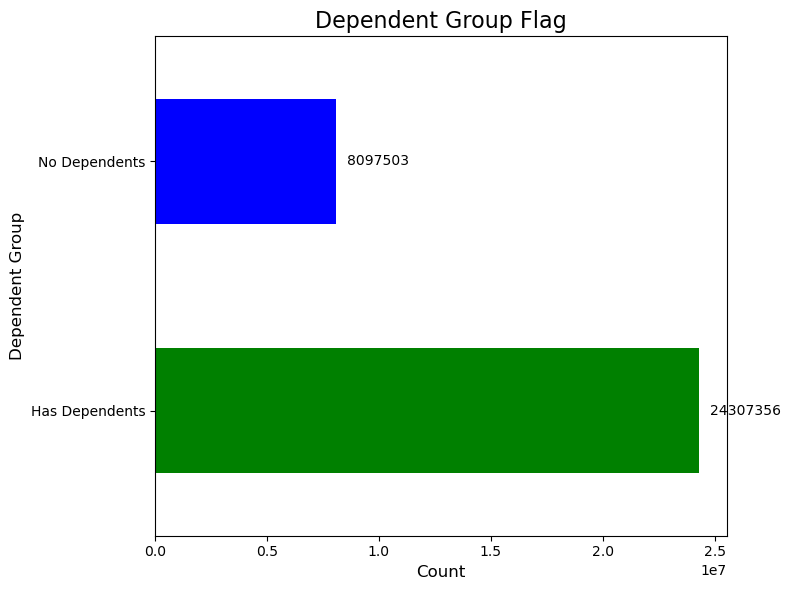

In [84]:
#Plot the horizontal bar chart
ax = barh.plot.barh(color=['green', 'blue'], figsize=(8, 6))
plt.title('Dependent Group Flag', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Dependent Group', fontsize=12)
for i, value in enumerate(barh):
    plt.text(value + 0.02 * barh.max(), i, f'{value}', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()

Observation: Clearly, most of the customer base has dependents.  I wanted to experiment a little with the capability of Python and the libraries to annotate and label this horizontal bar chart.  I liked trying to figure out how to create a visual that would not only highlight the data, but also try to make it look like the visuals I learned how to create in Tableau.  This was a fun challenge.  I referenced Google and ChaptGPT for help with the correct codes; for example, barh() is horizontal bar chart.  Enumerate, plt.text and f'value' were used to annotate the totals ON the bars of the bar chart.  I used plt.title, plt.xlabel, and plt.ylabel to give a title to the bar chart and then lable the x and y axis with titles of my choice.

In [86]:
#Saving BAR chart to "Visualizations" folder by assigning the result to a variable
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Ex4.10_Dependent_Group_Flag_BarH.png'))

9. ***Task 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure***

In [88]:
#Calculating mode for each customer and order_day_of_week_name
df_opc.groupby('Customer_ID').agg({'order_day_of_week_name': 'first'})

,order_day_of_week_name
Customer_ID,
1,Tuesday
2,Tuesday
3,Monday
4,Saturday
5,Wednesday
...,...
206205,Thursday
206206,Wednesday
206207,Saturday


In [89]:
#Define the mode_df  
mode_df = df_opc.groupby('Customer_ID').agg({'order_day_of_week_name': 'first'})

In [90]:
#Count the occurrences of each day of the week
day_counts = mode_df['order_day_of_week_name'].value_counts()

In [91]:
#Display the counts
day_counts

order_day_of_week_name
Sunday       38517
Monday       34976
Saturday     28689
Tuesday      27863
Friday       26071
Wednesday    25656
Thursday     24437
Name: count, dtype: int64

In [92]:
#Calculating mean and min for prices by customer
df_opc.groupby('Customer_ID').agg({'prices':['min', 'max', 'mean']})

prices                
               min   max      mean
Customer_ID                       
1              1.0  14.0  6.367797
2              1.3  14.8  7.515897
3              1.3  14.4  8.197727
4              1.4  14.6  8.205556
5              3.2  14.8  9.189189
...            ...   ...       ...
206205         1.4  23.8  8.909375
206206         1.1  14.8  7.646667
206207         1.2  24.7  7.313453
206208         1.1  21.6  8.366617
206209         1.1  18.8  7.058915

[206209 rows x 3 columns]

In [93]:
#Define the mode_df  
prices_count = df_opc.groupby('Customer_ID').agg({'prices': 'first'})

In [94]:
#Display the counts
prices_count

,prices
Customer_ID,
1,9.0
2,5.2
3,8.8
4,9.4
5,10.7
...,...
206205,12.8
206206,10.8
206207,6.3


In [95]:
#Calculating min and max for orders by customer
df_opc.groupby('Customer_ID').agg({'order_number':['min', 'max']})

order_number    
                     min max
Customer_ID                 
1                      1  10
2                      1  14
3                      1  12
4                      1   5
5                      1   4
...                  ...  ..
206205                 1   3
206206                 1  67
206207                 1  16
206208                 1  49
206209                 1  13

[206209 rows x 2 columns]

In [96]:
#Define the prices_counts
prices_counts=df_opc.groupby('Customer_ID').agg({'order_number':['min', 'max']})

In [97]:
#Print the prices_count with customer ID
prices_counts

order_number    
                     min max
Customer_ID                 
1                      1  10
2                      1  14
3                      1  12
4                      1   5
5                      1   4
...                  ...  ..
206205                 1   3
206206                 1  67
206207                 1  16
206208                 1  49
206209                 1  13

[206209 rows x 2 columns]

10. ***Task 8: Compare customer profiles with regions and departments by identifying possible links to see if customers demonstrate different behaviors across regions***

***8a Using Crosstabs to identify relationships within the customer profile in SIX categories:*** 

***Regional Trends***
 - Identifying which regions have higher proportions of high-spending customers
 - Do shopping preferences vary by day across regions?

***Gender Analysis***
 - Do male or female customers tend to shop more on certain busy days?
 - Are men or women more likely to shop during specific times during the day?

***Family & Age Dynamics***
 - How does family status influence ordering frequency?
 - Which age groups favor low-range priced products vs mid-range priced products?

***Time-Based Patterns***
 - Are specific hours aligned with morning, afternoon or evening periods?
 - On which days do high-spending customers make purchases?

***Loyalty & Income Insights***
 - Are loyal customers concentrated in certain income brackets?
 - Do loyal customers spend more in specific departments?

***Household Size***
- How does the number of dependents affect spending behavior?
- Does household size influence how often customers place orders?

***REGIONAL TRENDS : Region vs. Spending Flag***

***Indentifying which regions have higher proportions of high-spending customers***

In [102]:
#Create crosstab to identify which regions have higher proportions of high-spending customers.
region_vs_spend_flag=pd.crosstab(df_opc['Region'], df_opc['spend_flag'], normalize='index') * 100

In [103]:
#Convert values to percentages
region_vs_spend_flag_= region_vs_spend_flag.div(region_vs_spend_flag.sum(axis=1), axis=0) * 100

In [104]:
#Display crosstabe for region vs spend flag
region_vs_spend_flag

spend_flag,High Spender,Low Spender
Region,,
Midwest,2.053025,97.946975
Northeast,1.891141,98.108859
South,1.968680,98.031320
West,1.933627,98.066373


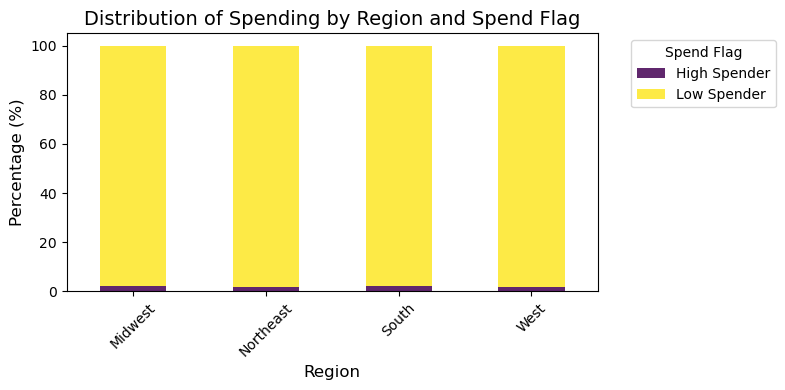

In [105]:
#Plot the stacked bar chart 
ax = region_vs_spend_flag.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 4),
    colormap="viridis",
    alpha=0.85
)
#Titles and labels
plt.title("Distribution of Spending by Region and Spend Flag", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(title="Spend Flag", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [106]:
#Saving plot chart to "Visualizations" folder 
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Ex4.10_Region_vs_Spend_Flag.png'))

Observations: While High Spenders are a small segment, they likely contribute a disproportionate share of revenue. Special attention (e.g., loyalty programs or targeted campaigns) could help attract or retain these customers.  The Midwest has the highest percentage of High Spenders (2.05%), which might make it a suitable region for piloting premium services or targeted promotions for this segment.   The percentage of High Spenders is the lowest (1.89%) in the Northeast; there may be opportunities to convert some Low Spenders into High Spenders through personalized offers, marketing strategies, or incentives. Low Spenders can be targeted with offers to increase spending, such as discounts, cross-selling strategies, or bundled promotions.

***REGIONAL TRENDS : Region vs. Order_Day_of_Week_Name***

***Do shopping preferences vary by day across regions?***

In [110]:
#Create a crosstab to calculate the percentage for each region by order day of the week
region_vs_day_week_name = pd.crosstab( 
    df_opc['Region'],
    df_opc['order_day_of_week_name'], 
    normalize='index'  
) * 100  

In [111]:
#Format the percentages to two decimal places
region_vs_day_week_name = region_vs_day_week_name.round(2)

In [112]:
#Display the crosstab
region_vs_day_week_name

order_day_of_week_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Region,,,,,,,
Midwest,12.94,17.38,13.93,19.22,11.69,13.05,11.78
Northeast,13.04,17.47,13.76,19.17,11.64,13.04,11.87
South,12.99,17.51,13.86,19.01,11.64,13.03,11.95
West,12.98,17.45,13.92,19.22,11.71,12.92,11.80


In [113]:
#Export directly to Excel
region_vs_day_week_name.to_excel('region_day_crosstab.xlsx')

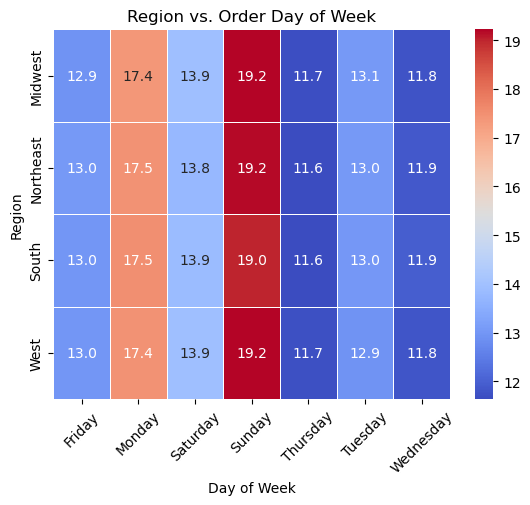

In [114]:
#Visual to display spending behavior by day of the week name for each region
ax = sns.heatmap(region_vs_day_week_name, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Region vs. Order Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Region")
plt.xticks(rotation=45)
plt.show()

Observation: The Midwest and West are on top in terms of weekly spend. Sunday is the busiest spending  day for all regions, followed by Monday.  Tuesday and Friday are the next busiest days, followed by Wednesday and Thursday.  

In [116]:
#Saving plot chart to "Visualizations" folder 
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Ex4.10_region_vs_day_week_name.png'))

***GENDER ANALYSIS : Gender vs. Busiest Days***

***Do male or female customers tend to shop more on certain busy days?***

In [119]:
#Create a crosstab to calculate the percentage for each gender by busiest day
gender_vs_busiest_days = pd.crosstab( 
    df_opc['Gender'],
    df_opc['Busiest_Days'], 
    normalize='index'  
) * 100 

In [120]:
#Format the percentages to two decimal places
gender_vs_busiest_days = gender_vs_busiest_days.round(2)

In [121]:
#Display crosstab
gender_vs_busiest_days

Busiest_Days,Busiest Days,Regularly Busy Days,Slowest Days
Gender,,,
Female,36.58,39.90,23.52
Male,36.65,39.82,23.54


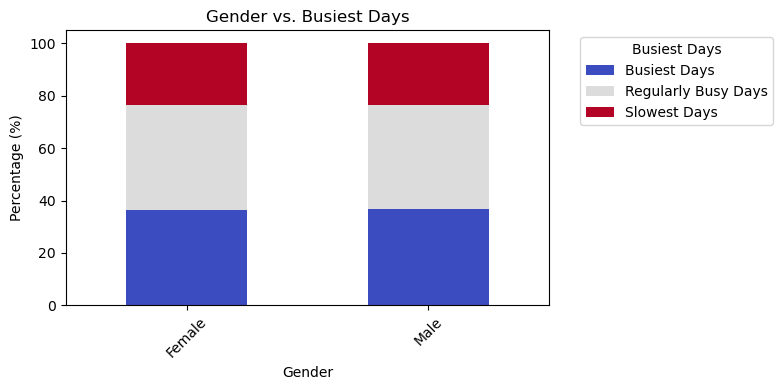

In [122]:
#Bar Chart to show distribution of Gender vs Busiest days
ax = gender_vs_busiest_days.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='coolwarm')
plt.title("Gender vs. Busiest Days")
plt.ylabel("Percentage (%)")
plt.xlabel("Gender")
plt.xticks(rotation=45)
plt.legend(title="Busiest Days", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Observation: The distribution is relatively flat.  Both male and female shop almost equally on busiest days (37%), on regular busy days (40%) and on the slowest days (24%).  Since the busiest days account for 37% of orders, Instacart might consider prioritizing staffing and inventory on those days. For the slowest days, marketing might consider promotions or targeted campaigns to encourage more shopping activity on these days. 

In [124]:
#Saving plot chart to "Visualizations" folder 
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Ex4.10_gender_vs_busiest_days.png'))

***GENDER ANALYSIS : Gender vs. Busiest Period of Day***

***Are men or women more likely to shop during specific times during the day?***

In [127]:
#Create a crosstab to calculate the percentage for each gender by busiest period of the day
gender_vs_busiest_period = pd.crosstab(
    index=[df_opc['Gender']], 
    columns=[df_opc['Busiest_Period_of_Day']],
    normalize='index'
) * 100


In [128]:
#Format the percentages to two decimal places
gender_vs_busiest_period = gender_vs_busiest_period.round(2)

In [129]:
#Display crosstab
gender_vs_busiest_period

Busiest_Period_of_Day,Average_Orders,Fewest_Orders,Most_Orders
Gender,,,
Female,30.81,3.98,65.21
Male,30.89,3.98,65.13


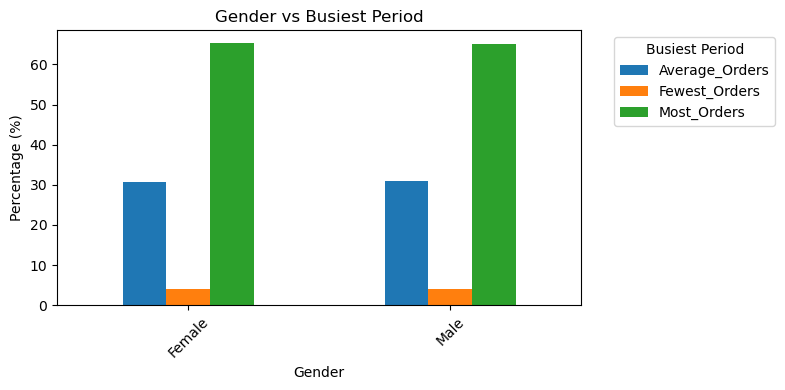

In [130]:
#Bar Chart to show distribution of Gender vs Busiest Period of Day
ax = gender_vs_busiest_period.plot(kind='bar', figsize=(8, 4))
plt.title("Gender vs Busiest Period")
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.legend(title="Busiest Period", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Obsdrvations: For edification, the "Busiest_Period_of_Day" categorized the busiest hours of day when orders were placed by customers.  The categories are: Most Orders, which were placed during the hours of 10, 11, 14, 15, 13, 12, 16, 9.  Average Orders were placed during the hours of 17, 8, 18,19, 20, 7, 21, 22.  The Fewest Orders were placed during the hours of 23,6, 0, 1, 5, 2, 4, 3.  From this analysis, we can see that males and females  are relatively uniform in the times at which they place their orders.  Sixty-five percent of the time, they place orders in the Most Orders category, 31% of the time, they place orders in the Average Orders category and 4% of the time, they place orders in the Fewest Orders category.

In [132]:
#Saving plot chart to "Visualizations" folder 
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Ex4.10_gender_vs_busiest_period.png'))

***FAMILY AND AGE DYNAMICS : Family Status vs Order Frequency***

***How does family status influence ordering frequency?***

In [135]:
#Create a crosstab to calculate the total for family status vs average days between orders
family_status_vs_order_frequency = pd.crosstab(
    index=[df_opc['Family Status']], 
    columns=[df_opc['order_frequency_flag']],
    dropna=False,
    normalize='index'
)*100

In [136]:
#Format the percentages to two decimal places
family_status_vs_order_frequency = family_status_vs_order_frequency.round(2)

In [137]:
#Display crosstab
family_status_vs_order_frequency

order_frequency_flag,Fequent Customer,Non-Frequent Customer,Regular Customer
Family Status,,,
divorced/widowed,70.59,8.19,21.22
living with parents and siblings,71.28,8.32,20.40
married,70.31,8.33,21.36
single,70.13,8.15,21.71


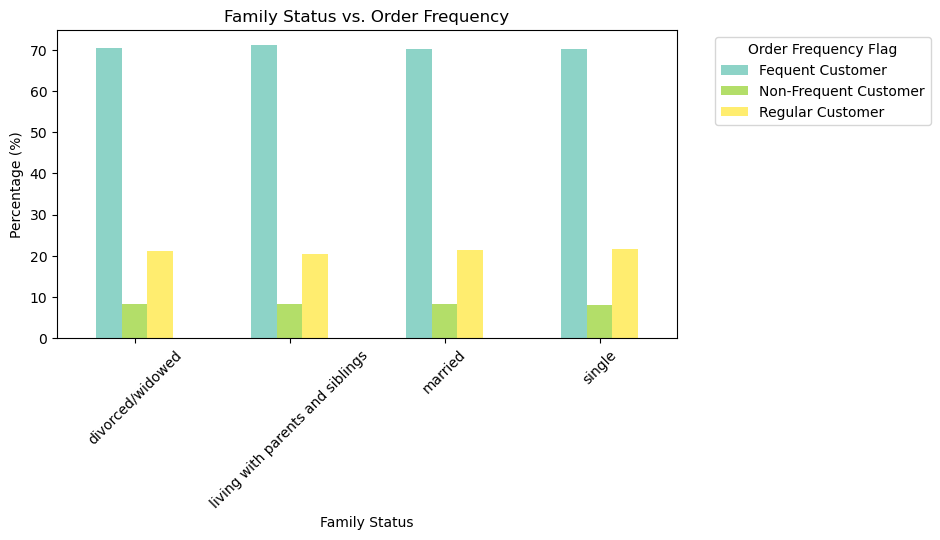

In [138]:
#Bar Chart to show distribution of Gender vs Busiest Period of Day
ax = family_status_vs_order_frequency.plot(kind='bar', figsize=(8,4), colormap='Set3')
plt.title("Family Status vs. Order Frequency")
plt.ylabel("Percentage (%)")
plt.xlabel("Family Status")
plt.xticks(rotation=45)
plt.legend(title="Order Frequency Flag", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Observations: The percentage of Frequent Customers is generally the same across all family statuses: ranging from 70% (Single) to 71% (Living w/ Parents & Siblings).  This pattern suggests that family status doesn't play a significant role in impacting spending behavior.  Additionally, there are slight behavioral differences in two spending categories:  
Regular Customers:  Singles show a marginally higher porportion of spending which may indicate less structure and more diverse spending habits.           
Frequent Customers: Those customers in the Living w. Parents & Siblings category are slightly more likely to shop more frequently; possibly due to shared household needs.

In [140]:
#Saving plot chart to "Visualizations" folder 
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Ex4.10_family_status_vs_order_frequency.png'))

***FAMILY AND AGE DYNAMICS : Age vs Price Range***

***Which age groups favor low-range priced products vs mid-range priced products?***

In [143]:
#Define age groups and create bins
age_bins = [18, 24, 34, 44, 54, 64, 74, 81]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-81']

In [144]:
#Create a new column 'Age Group' with age ranges
df_opc['Age Group'] = pd.cut(df_opc['Age'], bins=age_bins, labels=age_labels, right=True)

In [145]:
# Verify the grouping
df_opc[['Age', 'Age Group']].head()

,Age,Age Group
0,31,25-34
1,31,25-34
2,31,25-34
3,31,25-34
4,31,25-34


In [146]:
#Create crosstab for comparison of age groups vs price ranges
age_group_vs_price_range_loc = pd.crosstab(df_opc['Age Group'], df_opc['price_range_loc'], normalize='index') * 100

In [147]:
#Display crosstab for Age Group vs Price Range
age_group_vs_price_range_loc

price_range_loc,Low-Range Product,Mid-Range Product
Age Group,,
18-24,96.019634,3.980366
25-34,96.079653,3.920347
35-44,96.067814,3.932186
45-54,96.053055,3.946945
55-64,96.058833,3.941167
65-74,95.973195,4.026805
75-81,96.007791,3.992209


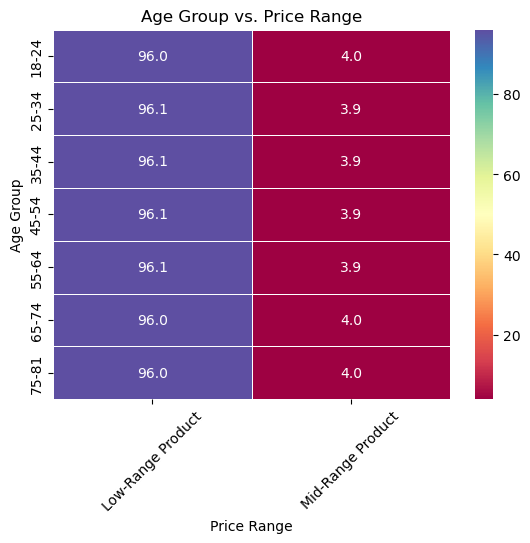

In [148]:
#Create HEATMAP to compare Age Group vs Price Range
ax = sns.heatmap(
    age_group_vs_price_range_loc, 
    annot=True, 
    fmt=".1f", 
    cmap="Spectral", 
    linewidths=0.5
)
plt.title("Age Group vs. Price Range")
plt.xlabel("Price Range")
plt.ylabel("Age Group")
plt.xticks(rotation=45)
plt.show()

Observation: Overall Dominance of Low-Range Products in all age groups.

Low-range products account for about 96% of purchases, with little variation between age groups. Mid-range products make up a very small portion of purchases, ranging between 3.92% and 4.03%. 

Slight Preference for Mid-Range Products Among Older Age Groups:
The 65–74 age group has the highest percentage of mid-range product purchases (4.03%), followed closely by the 75–81 age group (3.99%). Younger groups (18–34) are slightly less likely to purchase mid-range products (around 3.92–3.98%). 

Minimal Variation Across Age Groups:
The percentages are remarkably consistent, suggesting a strong preference for low-range products across demographics.

In [150]:
#Saving plot chart to "Visualizations" folder 
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Ex4.10_age_group_vs_price_range_loc.png'))

***TIME-BASED PATTERNS : Order Hour of Day vs Busiest Period of Day***

***Are specific hours aligned with morning, afternoon or evening periods?***

In [153]:
#Create crosstab and normalize numbers to show percentages of orders during time periods
order_hr_day_vs_busiest_period_day = pd.crosstab(
    index=df_opc['order_hour_of_day'],  #Rows: Order Hour of Day
    columns=df_opc['Busiest_Period_of_Day'],  #Columns: Busiest Period of Day
    normalize='index'
) * 100


In [154]:
#Format the percentages to two decimal places
order_hr_day_vs_busiest_period_day = order_hr_day_vs_busiest_period_day.round(2)

In [155]:
#Display crosstab for Age Group vs Price Range
order_hr_day_vs_busiest_period_day

Busiest_Period_of_Day,Average_Orders,Fewest_Orders,Most_Orders
order_hour_of_day,,,
0,0.0,100.0,0.0
1,0.0,100.0,0.0
2,0.0,100.0,0.0
3,0.0,100.0,0.0
4,0.0,100.0,0.0
5,0.0,100.0,0.0
6,0.0,100.0,0.0
7,100.0,0.0,0.0
8,100.0,0.0,0.0


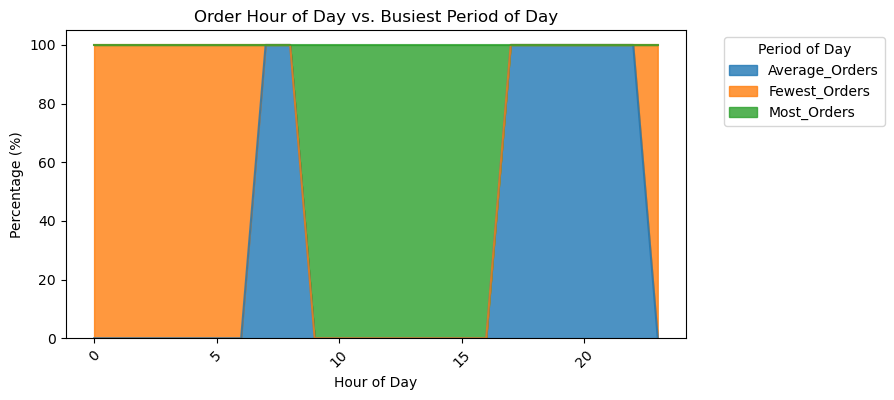

In [156]:
#Create stacked area chart to show busiest period vs order hour
ax = order_hr_day_vs_busiest_period_day.plot(
    kind='area', 
    figsize=(8, 4), 
    stacked=True, 
    alpha=0.8
)
plt.title("Order Hour of Day vs. Busiest Period of Day")
plt.ylabel("Percentage (%)")
plt.xlabel("Hour of Day")
plt.xticks(rotation=45)
plt.legend(title="Period of Day", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Observations: Percentages were used to see patterns during hours of the day, rather than listing actual numbers of orders.  The crosstab table shows 100% alighnment, meaning that all order placed during a specific hour of the day fall exclusively into one activity category (Most, Average, Fewest).  There is no overlap between categories.

Time-Based ordering analysis: 

Morning Period (6 AM to 12 PM):
Early morning hours (6 AM to 8 AM) have "Average Orders."
Late morning hours (9 AM to 12 PM) have "Most Orders," indicating high activity.

Afternoon Period (12 PM to 5 PM):
These hours predominantly align with "Most Orders," making the afternoon a high-activity period.

Evening Period (5 PM to 10 PM):
Evening hours align with "Average Orders," showing steady but not peak activity.

Late Night Period (10 PM to 5 AM):
These hours are dominated by "Fewest Orders," reflecting minimal shopping activity.

In [158]:
#Saving plot chart to "Visualizations" folder 
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Ex4.10_order_hr_day_vs_busiest_period_day.png'))

***TIME-BASED PATTERNS : Order Day of Week vs Spend Flag***

**On which days do high-spending customers make purchases?***

In [161]:
#Create crosstab BAR Chart to compare Order Day of Week vs Spend Flag
order_day_week_vs_spend_flag = pd.crosstab(df_opc['order_day_of_week_name'], df_opc['spend_flag'], normalize='index') * 100

In [162]:
#Format the percentages to two decimal places
order_day_week_vs_spend_flag = order_day_week_vs_spend_flag.round(2)

In [163]:
#Display crosstab for Age Group vs Price Range
order_day_week_vs_spend_flag

spend_flag,High Spender,Low Spender
order_day_of_week_name,,
Friday,2.08,97.92
Monday,2.02,97.98
Saturday,1.81,98.19
Sunday,1.72,98.28
Thursday,2.07,97.93
Tuesday,2.06,97.94
Wednesday,2.08,97.92


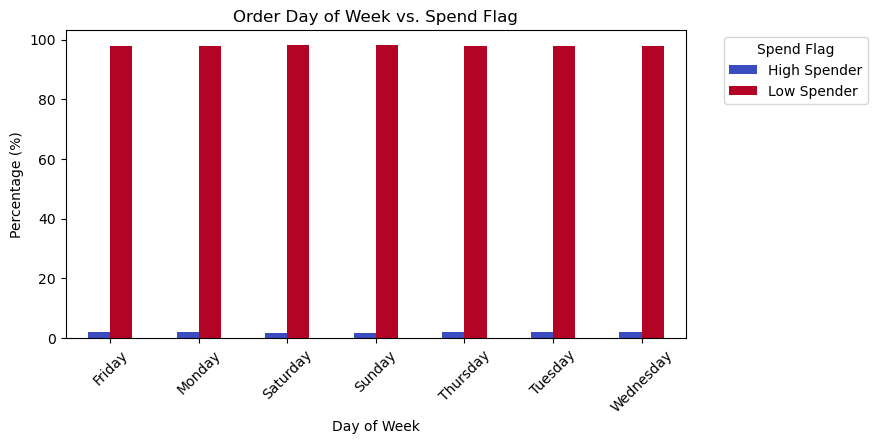

In [164]:
#Create line chart for to compare day of the week and spending 
ax = order_day_week_vs_spend_flag.plot(kind='bar', figsize=(8, 4), colormap='coolwarm')
plt.title("Order Day of Week vs. Spend Flag")
plt.ylabel("Percentage (%)")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.legend(title="Spend Flag", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Observations:  The proportion of high spenders is fairly consistent across different days of the week, averaging around 2%. Low spenders make up the majority at around 98% throughout all days during the week.

Slight Variance: Slightly fewer high spenders (1.8% & 1.7%) on weekends (Saturday and Sunday), which could mean lower engagement from high spenders during these days.

In [166]:
#Saving plot chart to "Visualizations" folder 
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Ex4.10_order_day_week_vs_spend_flag.png'))

***LOYALTY & INCOME INSIGHTS : Loyalty Flag vs Income Brackets***

***Are loyal customers concentrated in certain income brackets?***

In [169]:
#Define income brackets and create bins
income_bins = [25903, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 593901]
income_labels = [
    '$25K-$50K', '$50K-$100K', '$100K-$150K', '$150K-$200K', 
    '$200K-$300K', '$300K-$400K', '$400K-$500K', '$500K+'
]

In [170]:
#Create a new column 'Income Bracket' with income ranges
df_opc['Income_Brackets'] = pd.cut(df_opc['Income'], bins=income_bins, labels=income_labels, right=True)

In [171]:
# Verify the grouping
df_opc[['Income', 'Income_Brackets']].head()

,Income,Income_Brackets
0,40423,$25K-$50K
1,40423,$25K-$50K
2,40423,$25K-$50K
3,40423,$25K-$50K
4,40423,$25K-$50K


In [172]:
#Create crosstab for Loyalty Flag vs Income Brackets
loyalty_flag_vs_income = pd.crosstab(df_opc['loyalty_flag'], df_opc['Income_Brackets'], normalize='index') * 100

In [173]:
#Format the percentages to two decimal places
loyalty_flag_vs_income = loyalty_flag_vs_income.round(2)

In [174]:
#Display crosstab for Loyalty vs Income
loyalty_flag_vs_income

Income_Brackets,$25K-$50K,$50K-$100K,$100K-$150K,$150K-$200K,$200K-$300K,$300K-$400K,$400K-$500K,$500K+
loyalty_flag,,,,,,,,
Loyal Customer,10.04,43.69,33.52,11.78,0.57,0.23,0.10,0.06
New Customer,13.75,42.19,32.34,11.30,0.26,0.08,0.05,0.02
Regular Customer,10.72,43.26,33.36,11.81,0.51,0.16,0.09,0.08


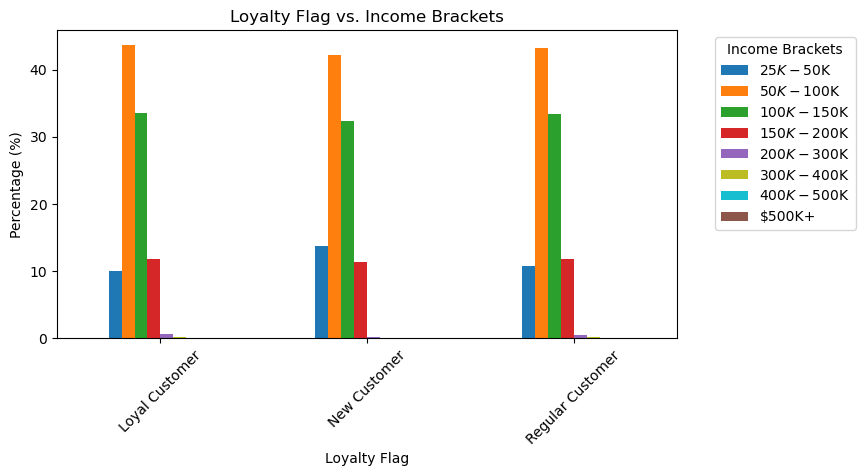

In [175]:
#Create bar cart to compare loyalty flag vs income brackets
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#bcbd22', '#17becf', '#8c564b']
ax = loyalty_flag_vs_income.plot(kind='bar', figsize=(8, 4), color=colors)
plt.title("Loyalty Flag vs. Income Brackets")
plt.ylabel("Percentage (%)")
plt.xlabel("Loyalty Flag")
plt.xticks(rotation=45)
plt.legend(title="Income Brackets", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Observations:  The line chart suggests that loyal customers are not uniquely concentrated in any specific category. Instead, all loyalty groups share a similar distribution, with the majority concentrated in the $50K–$100K and $100K–$150K income brackets. High-income and very low-income customers make up only a small fraction of the total customer base.

In [177]:
#Saving plot chart to "Visualizations" folder 
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Ex4.10_loyalty_flag_vs_income.png'))

***LOYALTY & INCOME INSIGHTS : Loyalty Flag vs Department***

***Do loyal customers spend more in specific departments?***

In [180]:
#Create dictionary for department mapping
department_mapping = {
    1: 'Frozen',
    2: 'Other',
    3: 'Bakery',
    4: 'Produce',
    5: 'Alcohol',
    6: 'International',
    7: 'Beverages',
    8: 'Pets',
    9: 'Dry Goods - Pasta',
    10: 'Bulk',
    11: 'Personal Care',
    12: 'Meat Seafood',
    13: 'Pantry',
    14: 'Breakfast',
    15: 'Canned Goods',
    16: 'Dairy Eggs',
    17: 'Household',
    18: 'Babies',
    19: 'Snacks',
    20: 'Deli',
    21: 'Missing'
   }

In [181]:
#Map department_id to department_name
df_opc['department_name'] = df_opc['department_id'].map(department_mapping)

In [182]:
#Create crosstab for comparison between loyalty flag and departments 
loyalty_flag_vs_dept = pd.crosstab(df_opc['loyalty_flag'], df_opc['department_name'], normalize='index') * 100

In [183]:
#Format the percentages to two decimal places
loyalty_flag_vs_dept = loyalty_flag_vs_dept.round(2)

In [184]:
#Display crosstab for Loyalty Flag vs Department
loyalty_flag_vs_dept

department_name,Alcohol,Babies,Bakery,Beverages,Breakfast,Bulk,Canned Goods,Dairy Eggs,Deli,Dry Goods - Pasta,...,Household,International,Meat Seafood,Missing,Other,Pantry,Personal Care,Pets,Produce,Snacks
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal Customer,0.38,1.62,3.69,8.31,2.15,0.13,2.86,17.80,3.15,2.36,...,1.91,0.76,1.97,0.18,0.10,5.45,1.20,0.25,30.60,9.17
New Customer,0.60,0.96,3.58,8.21,2.22,0.08,3.78,15.56,3.30,3.03,...,2.67,0.91,2.35,0.27,0.12,6.28,1.58,0.33,27.81,8.56
Regular Customer,0.49,1.24,3.58,8.32,2.16,0.10,3.38,16.35,3.28,2.74,...,2.36,0.84,2.27,0.21,0.11,5.81,1.42,0.33,28.94,8.88


In [185]:
#Export directly to Excel
loyalty_flag_vs_dept.to_excel("C:\\Users\\lisac\\10-10-2024 Instacart Basket Analysis\\loyalty_flag_vs_dept.xlsx")

These are the top 5 departments in each loyalty category:

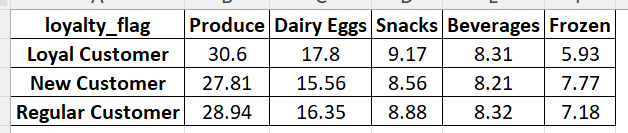

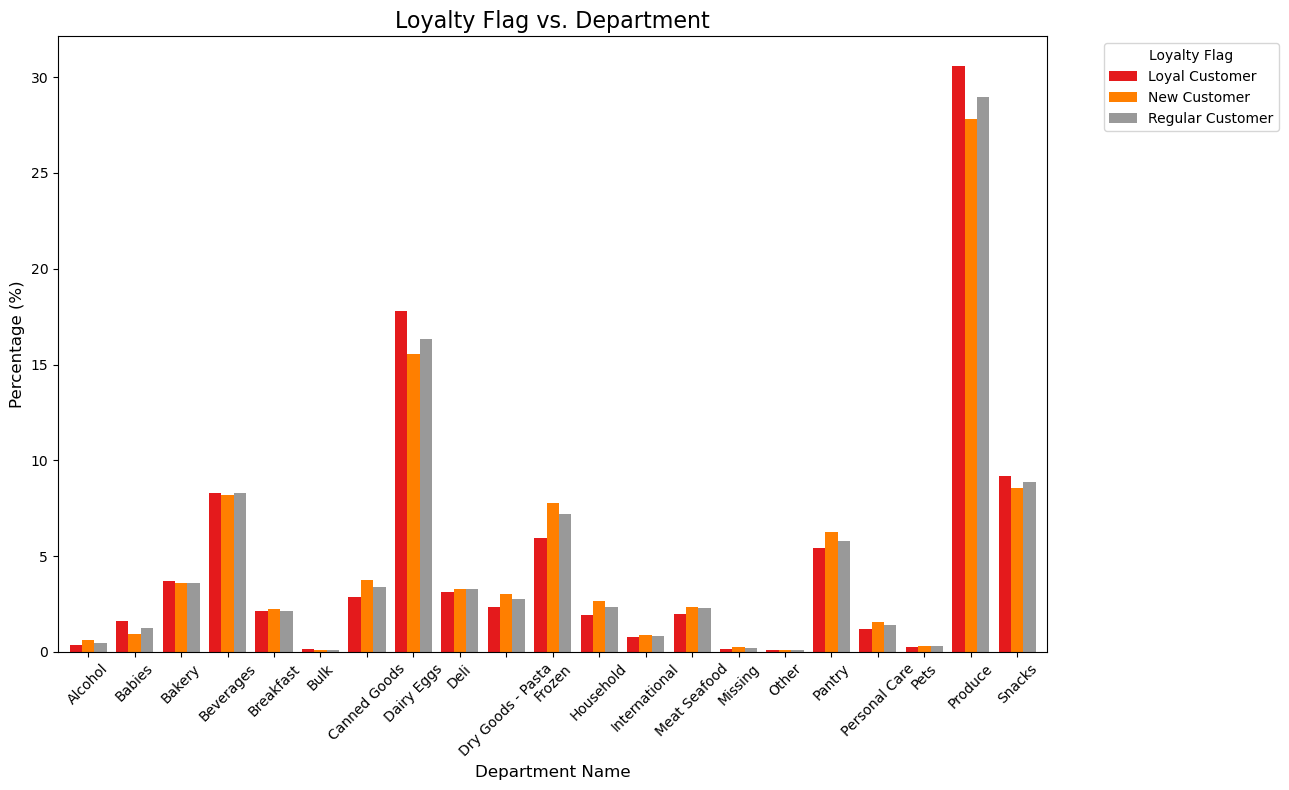

In [187]:
#Create crosstab and grouped bar chart comparing all departments by loyalty flag
ax1 = loyalty_flag_vs_dept.T.plot(kind='bar', figsize=(13, 8), width=0.8, cmap="Set1")  # Transpose the DataFrame for grouping
plt.title("Loyalty Flag vs. Department", fontsize=16)
plt.xlabel("Department Name", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Loyalty Flag", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

***Closer look at TOP 5 DEPARTMENTS : Produce, Dairy Eggs, Snacks, Beverages, and Frozen***

In [189]:
#Define the top 5 departments
top_departments = ['Produce', 'Dairy Eggs', 'Snacks', 'Beverages', 'Frozen']

In [190]:
#Filter the DataFrame using "isin" for only the top 5 departments
df_top_five = df_opc[df_opc['department_name'].isin(top_departments)]

In [191]:
#Create crosstab for loyalty_flag vs. top 5 departments
loyalty_income_topfive = pd.crosstab(df_top_five['loyalty_flag'], df_top_five['department_name'], normalize='index') * 100

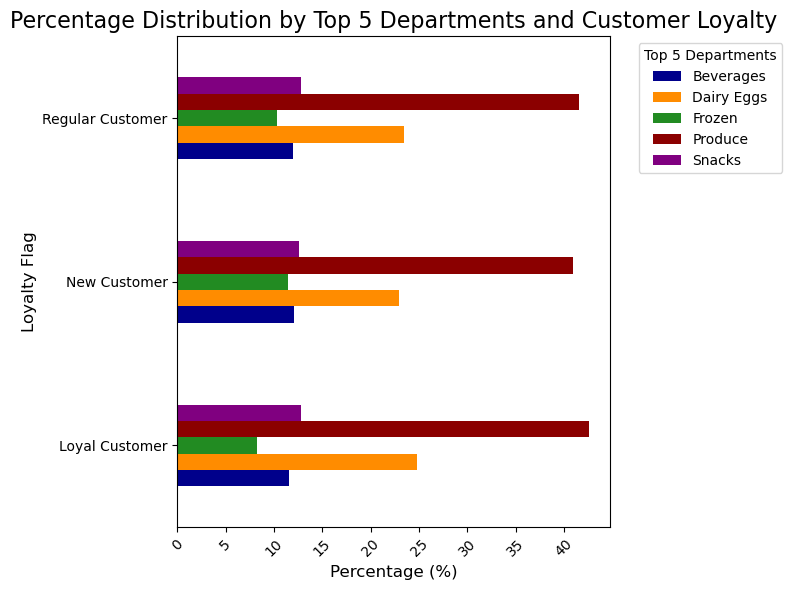

In [192]:
#Plot the crosstab
ax2 = loyalty_income_topfive.plot(kind='barh', figsize=(8, 6), color=['darkblue', 'darkorange', 'forestgreen', 'darkred', 'purple'])
plt.title('Percentage Distribution by Top 5 Departments and Customer Loyalty', fontsize=16)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Loyalty Flag', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Top 5 Departments', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

Observation Loyal Customers High Spending on Dairy Eggs (17.80%) and Produce (30.60%): These categories have the highest percentage of purchases among loyal customers. Moderate Spending on Beverages (8.31%) and Snacks (9.17%): Popular across the board in all customer categories. Low Spending on Alcohol (0.38%) and Other Items (0.10%): These categories have the lowest spending percentages.

New Customers High Spending on Dairy Eggs (15.56%) and Produce (27.81%): Similar to loyal customers, these categories are significant for new customers. Moderate Spending on Beverages (8.21%) and Snacks (8.56%): Again, these categories are commonly purchased by new customers. Low Spending on Alcohol (0.60%) and Other Items (0.12%): These categories have lower spending percentages.

Regular Customers High Spending on Dairy Eggs (16.35%) and Produce (28.94%): Consistently, these categories are crucial for regular customers as well. Moderate Spending on Beverages (8.32%) and Snacks (8.88%): These categories continue to be important. Low Spending on Alcohol (0.49%) and Other Items (0.11%): These remain the least purchased categories.

In [194]:
#Saving plot chart to "Visualizations" folder 
ax1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Ex4.10_loyalty_flag_vs_dept.png'))

In [195]:
#Saving plot chart to "Visualizations" folder 
ax2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Ex4.10_df_loyalty_income_topfive.png'))

***HOUSEHOLD SIZE : Number of Dependents vs Spend Flag***

***How does the number of dependents affect spending behavior?***

In [198]:
#Create crosstab for Number of Dependents vs Spend Flag
dependents_vs_spend_flag = pd.crosstab(df_opc['Number of Dependents'], df_opc['spend_flag'], normalize='index') * 100

In [199]:
#Format the percentages to two decimal places
dependents_vs_spend_flag = dependents_vs_spend_flag.round(2)

In [200]:
#Display crosstab for number of dependents vs spend flag
dependents_vs_spend_flag

spend_flag,High Spender,Low Spender
Number of Dependents,,
0,1.90,98.10
1,1.87,98.13
2,2.08,97.92
3,1.98,98.02


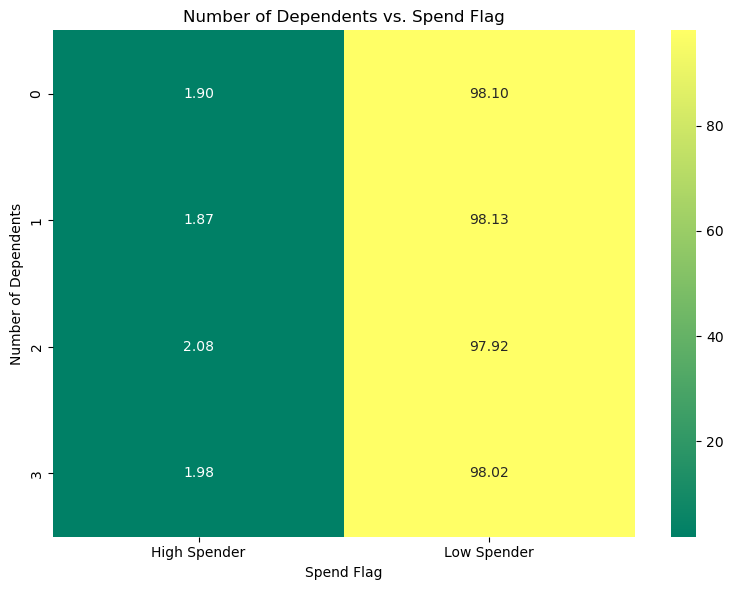

In [201]:
#Show heatmap visualization
plt.figure(figsize=(8,6))
ax = sns.heatmap(dependents_vs_spend_flag, annot=True, cmap='summer', fmt=".2f", cbar=True)
plt.title("Number of Dependents vs. Spend Flag")
plt.xlabel("Spend Flag")
plt.ylabel("Number of Dependents")
plt.tight_layout()
plt.show()

Observations : Low spenders consistently make up the majority of each dependent category 

***For individuals with 0 dependents:***
High Spenders make up 1.9%, while Low Spenders make up 98.1%.

***For individuals with 1 dependent:***
High Spenders make up 1.87%, while Low Spenders make up 98.13%. 

***For individuals with 2 dependents:***
High Spenders make up 2.08%, while Low Spenders: 97.92%. 

***For individuals with 3 dependents:***
High Spenders make up 1.98%, while Low Spenders make up 98.02%.

In [203]:
#Saving plot chart to "Visualizations" folder 
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Ex4.10_dependents_vs_spend_flag.png'))

***HOUSEHOLD SIZE : Number of Dependents vs Order Frequency***

***Does household size influence how often customers place orders?***

In [206]:
#Create crosstab to compare number of dependents vs order frequency flag
dependents_vs_order_frequency_flag = pd.crosstab(df_opc['Number of Dependents'], df_opc['order_frequency_flag'], normalize='index') * 100

In [207]:
#Format the percentages to two decimal places
dependents_vs_order_frequency_flag = dependents_vs_order_frequency_flag.round(2)

In [208]:
#Display crosstab for number of dependents vs spend flag
dependents_vs_order_frequency_flag

order_frequency_flag,Fequent Customer,Non-Frequent Customer,Regular Customer
Number of Dependents,,,
0,70.29,8.17,21.54
1,70.44,8.39,21.17
2,70.46,8.32,21.22
3,70.21,8.30,21.49


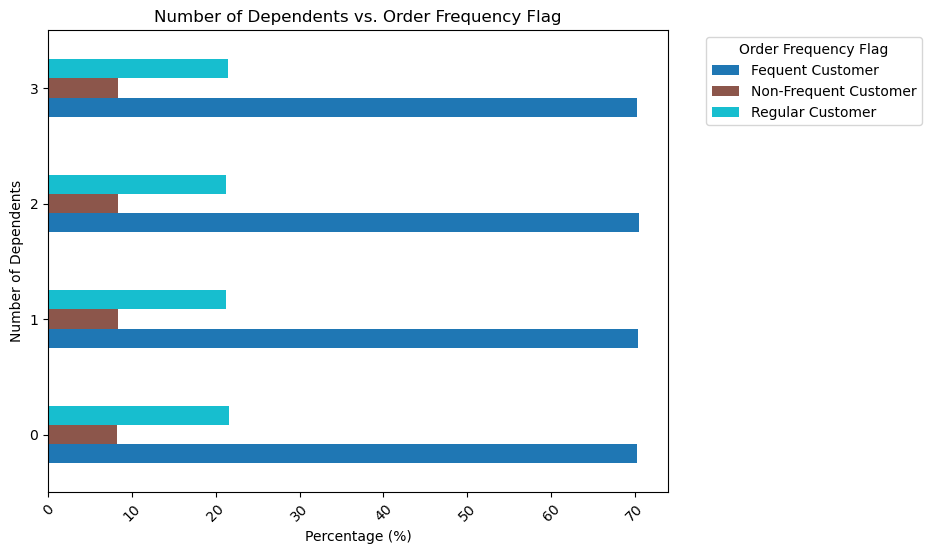

In [209]:
#Create horizontal grouped bar chart
ax = dependents_vs_order_frequency_flag.plot(kind='barh', figsize=(8, 6), colormap='tab10')
plt.title("Number of Dependents vs. Order Frequency Flag")
plt.ylabel("Number of Dependents")
plt.xlabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="Order Frequency Flag", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Observation From this analysis, it appears that household size does not significantly influence order frequency. The behavior of frequent, regular, and non-frequent customers is remarkably consistent across all household sizes. This consistency might imply that order frequency is driven by other factors, such as individual customer habits, product preferences, or marketing efforts, rather than the number of dependents in a household.

In [211]:
#Saving plot chart to "Visualizations" folder 
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Ex4.10_dependents_vs_order_frequency_flag.png'))

12.***Export DataFrame to .pkl file in Prepared Data folder***

In [213]:
#Inspecting df_opc for complete list of column headers
df_opc.head()
df_opc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 43 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   order_id                 int64   
 1   Customer_ID              int64   
 2   order_number             int64   
 3   order_hour_of_day        int64   
 4   days_since_prior_order   float64 
 5   order_day_of_week_name   object  
 6   is_first_order           int64   
 7   product_id               int64   
 8   add_to_cart_order        int64   
 9   reordered                int64   
 10  _merge_old               category
 11  product_name             object  
 12  aisle_id                 int64   
 13  department_id            int64   
 14  prices                   float64 
 15  price_range_loc          object  
 16  Busiest_Day              object  
 17  Busiest_Days             object  
 18  Busiest_Period_of_Day    object  
 19  max_order                int64   
 20  loyalty_flag          

In [214]:
#Checking number of rows and columns via .shape function
df_opc.shape

(32404859, 43)

Observation: Rows stayed the same; however, the columns increased by 8.

In [216]:
#Confirm dataframe is pandas
print(type(df_opc)) 

<class 'pandas.core.frame.DataFrame'>


In [217]:
df_opc.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Instacart_Final_Project_Ex4.10.pkl'))